In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models


In [2]:
data_dir = 'brain_alzheimer'

image_path = []
labels = []

for label in os.listdir(data_dir):
    for img_file in os.listdir(os.path.join(data_dir,label)):
        image_path.append(os.path.join(data_dir,label,img_file))
        labels.append(label)

data = pd.DataFrame({
    'img_path': image_path,
    'label': labels
})

In [3]:
data

,img_path,label
0,brain_alzheimer\MildDemented\26 (19).jpg,MildDemented
1,brain_alzheimer\MildDemented\26 (20).jpg,MildDemented
2,brain_alzheimer\MildDemented\26 (21).jpg,MildDemented
3,brain_alzheimer\MildDemented\26 (22).jpg,MildDemented
4,brain_alzheimer\MildDemented\26 (23).jpg,MildDemented
...,...,...
6395,brain_alzheimer\VeryMildDemented\verymildDem99...,VeryMildDemented
6396,brain_alzheimer\VeryMildDemented\verymildDem99...,VeryMildDemented
6397,brain_alzheimer\VeryMildDemented\verymildDem99...,VeryMildDemented
6398,brain_alzheimer\VeryMildDemented\verymildDem99...,VeryMildDemented


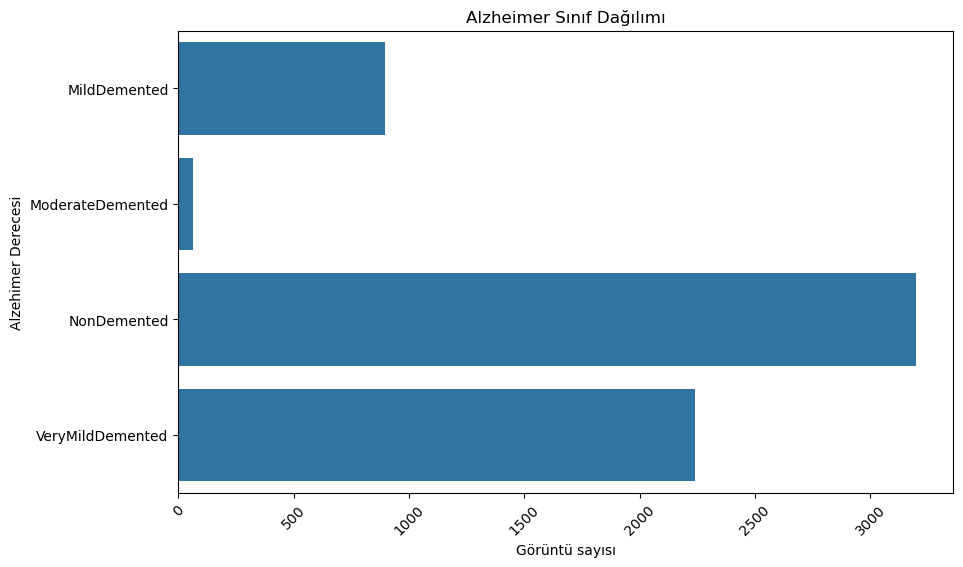

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data['label'])
plt.title('Alzheimer Sınıf Dağılımı')
plt.xlabel('Görüntü sayısı')
plt.ylabel('Alzehimer Derecesi')
plt.xticks(rotation = 45)
plt.show()

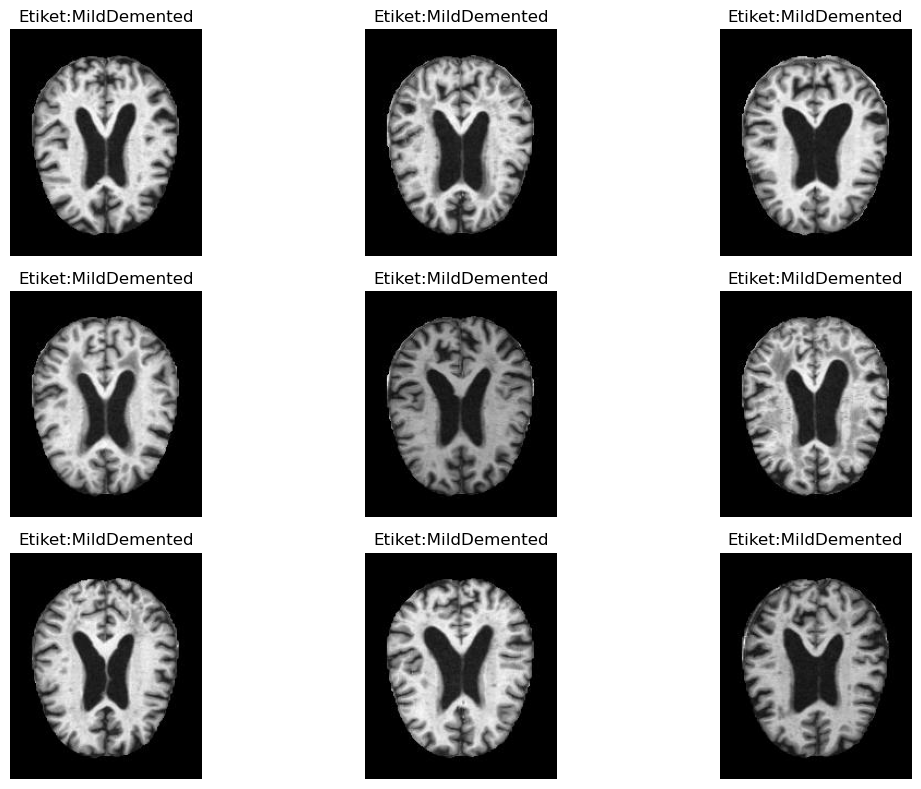

In [5]:
def beyin_resimleri(image_path, labelsi, num_samples=9):
    plt.figure(figsize=(12,8))
    for i in range(num_samples):
        img = cv2.imread(image_path[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f'Etiket:{labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

beyin_resimleri(image_path, labels, num_samples=9)

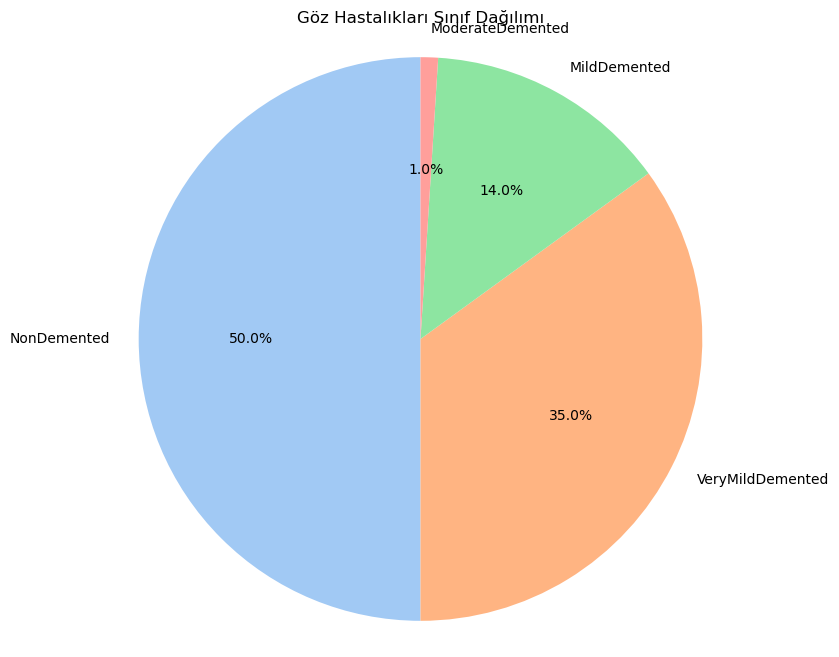

In [6]:
def pasta_grafik(labels):
    plt.figure(figsize=(8,8))
    label_counts= pd.Series(labels).value_counts()

    # pasta grafk çizimi
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Göz Hastalıkları Sınıf Dağılımı')
    plt.axis('equal') # dairesellik için
    plt.show()

pasta_grafik(labels)

In [7]:
IMG_SIZE = 224

def resim_boyutlanirma(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 225.0
    return img
X = np.array([resim_boyutlanirma(path) for path in data['img_path']])
y = pd.get_dummies(data['label']).values

In [8]:
y

array([[ True, False, False, False],
       [ True, False, False, False],
       [ True, False, False, False],
       ...,
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True]])

In [9]:
new_y = y.astype(int)
new_y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.33, random_state=42)

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3 )),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train[0]), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                    epochs=15, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))

c:\Users\omerf\anaconda3\envs\tensoeflow2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 71s 515ms/step - accuracy: 0.4777 - loss: 1.1061 - val_accuracy: 0.5459 - val_loss: 0.9283
Epoch 2/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 55s 413ms/step - accuracy: 0.5811 - loss: 0.8847 - val_accuracy: 0.6652 - val_loss: 0.7415
Epoch 3/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 55s 412ms/step - accuracy: 0.7145 - loss: 0.6511 - val_accuracy: 0.8158 - val_loss: 0.4420
Epoch 4/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 55s 411ms/step - accuracy: 0.8612 - loss: 0.3557 - val_accuracy: 0.7917 - val_loss: 0.4822
Epoch 5/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 56s 415ms/step - accuracy: 0.9348 - loss: 0.1620 - val_accuracy: 0.9129 - val_loss: 0.2578
Epoch 6/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 405ms/step - accuracy: 0.9863 - loss: 0.0607 - val_accuracy: 0.9593 - val_loss: 0.1155
Epoch 7/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 404ms/step - accuracy: 0.9871 - loss: 0.0407 - val_accuracy: 0.9588 - val_loss: 0.1302
Epoch 8/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 54s 404ms/step - accuracy: 0.9924 - loss: 0

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Doğruluk oranı: {test_acc}')

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.9805 - loss: 0.0689
Doğruluk oranı: 0.9777461886405945


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
   
print(f"Test seti doğruluğu: {test_accuracy * 100:.2f}%")

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9805 - loss: 0.0689
Test seti doğruluğu: 97.77%


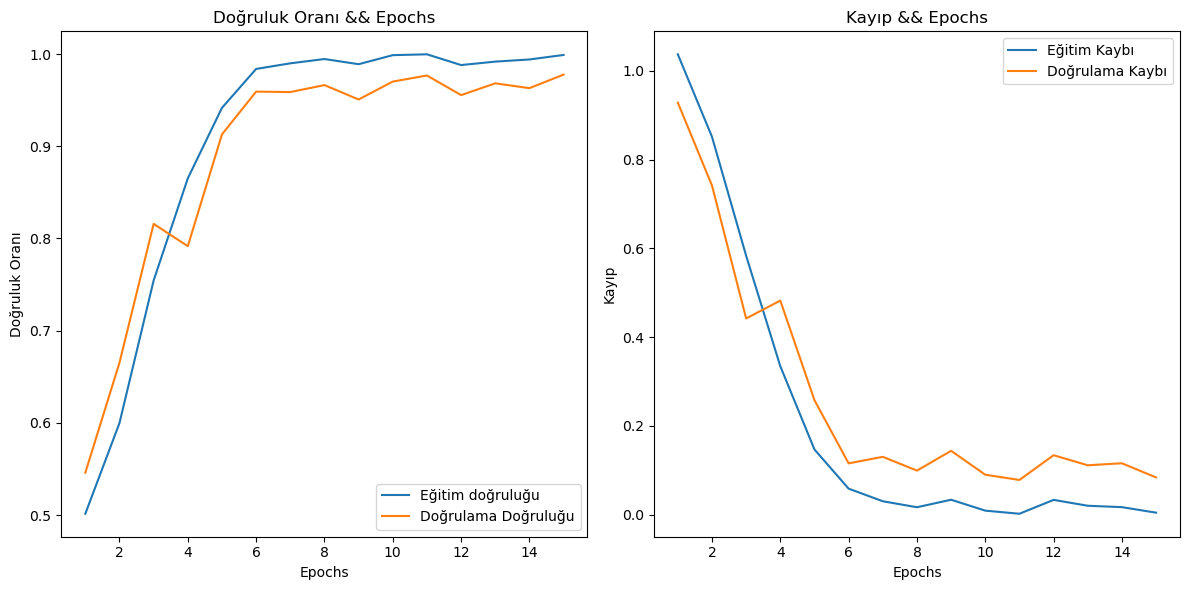

In [14]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_acc)+1)

# Doğruluk oranı
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Eğitim doğruluğu')
plt.plot(epochs, val_acc, label='Doğrulama Doğruluğu')
plt.title('Doğruluk Oranı && Epochs')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk Oranı')
plt.legend()

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Eğitim Kaybı')
plt.plot(epochs, val_loss, label='Doğrulama Kaybı')
plt.title('Kayıp && Epochs')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()